# Two Traveling Salespeople

Name: Melissa Sanchez

I understand that my submission needs to be my own work: Yes

Points: 10

## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

In [4]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(0, n-1)
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([2, 8, 4, 9], [1, 6, 7, 3, 0, 5])

In [6]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
          x         y
0  0.548814  0.791725
1  0.715189  0.528895
2  0.602763  0.568045
3  0.544883  0.925597
4  0.423655  0.071036
5  0.645894  0.087129
6  0.437587  0.020218
7  0.891773  0.832620
8  0.963663  0.778157
9  0.383442  0.870012
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.311064  0.230095  0.133929  0.731476  0.711252  0.779483   
1  0.311064  0.000000  0.119047  0.431713  0.542796  0.447167  0.579495   
2  0.230095  0.119047  0.000000  0.362207  0.528297  0.482845  0.572186   
3  0.133929  0.431713  0.362207  0.000000  0.863117  0.844530  0.911714   
4  0.731476  0.542796  0.528297  0.863117  0.000000  0.222821  0.052693   
5  0.711252  0.447167  0.482845  0.844530  0.222821  0.000000  0.218789   
6  0.779483  0.579495  0.572186  0.911714  0.052693  0.218789  0.000000   
7  0.345389  0.351327  0.391825  0.359134  0.893949  0.784992  0.930742   
8  0.415071  0.351952  0.417607  0.443976  0.889735  0.

In [6]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Caclulate the length of a single tour"""


    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    if not tour:
      return 0

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

objective value: 2.881937519770044


Tour length (red): 1.9
Tour length (blue): 2.88


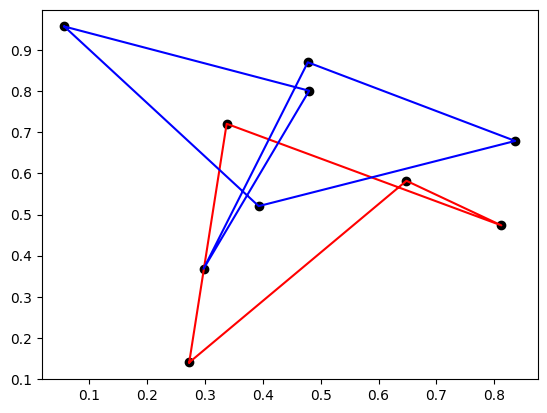

In [7]:
def show_2tsp(tsp, tour_pair = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [8]:
'''local moves will be to swap cities within each tour and between tours.
   1) the initial tour pair will be my starting point, this bing my current
      best max tour distance.
   2) I will first swap cities within each tour and yield tour pairs if the
      distance is less than the current/best max tour distance
   3) I will then swap citis between tours and yield tour pairs if the
      distance is less than the current/best max tour distance
  '''

def get_local_move(tour_pair):

  t_1 , t_2 = tour_pair
  seen_pairs = []
  seen_pairs.append(tour_pair)


  #swap cities within each tour
  for tour_index in [0,1]:
    tour = tour_pair[tour_index]

    if not tour:
      continue

    for i in range(len(tour)):
      for j in range(i+1, len(tour)):
        new_tour = tour.copy()
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]

        if tour_index == 0:
          new_tour_pair = (new_tour, t_2)
        else:
          new_tour_pair = (t_1, new_tour)

        if new_tour_pair in seen_pairs:
          continue

        seen_pairs.append(new_tour_pair)


        yield new_tour_pair

  #swap cities between tours
  if not t_1 or not t_2:
    return

  for i in range(len(t_1)):
    for j in range(len(t_2)):
      new_tour_1 = t_1.copy()
      new_tour_2 = t_2.copy()

      new_tour_1[i], new_tour_2[j] = new_tour_2[j],  new_tour_1[i]
      new_tour_pair = (new_tour_1, new_tour_2)

      if new_tour_pair in seen_pairs:
          continue

      seen_pairs.append(new_tour_pair)

      yield new_tour_pair








def steepest_ascent_hill_climming_search(tsp, tour_pair):

  moves_count = 0
  t_1, t_2 = tour_pair

  best_max_tour_distance = tour_pair_max_length(tsp, tour_pair)
  best_tour_pair = tour_pair

  for local_move in get_local_move(tour_pair):

    moves_count += 1
    local_tour_max_distance = tour_pair_max_length(tsp, local_move)

    #update best max distance and best tour pairs if one is found
    if local_tour_max_distance < best_max_tour_distance:
      best_max_tour_distance = local_tour_max_distance
      best_tour_pair = local_move



  return best_tour_pair, moves_count

objective = []
local_moves = []
tsp = random_tsp(10)
for i in range(50):
  tour_pair = random_tour_pair(10)
  best_tour_pair, moves_count = steepest_ascent_hill_climming_search(tsp, tour_pair)
  objective.append(tour_pair_max_length(tsp, best_tour_pair))
  local_moves.append(moves_count)

print(f"Average objective value: {np.mean(objective)}")
print(f"Average number of local moves: {np.mean(local_moves)}")




Average objective value: 2.604010218475662
Average number of local moves: 45.0


## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

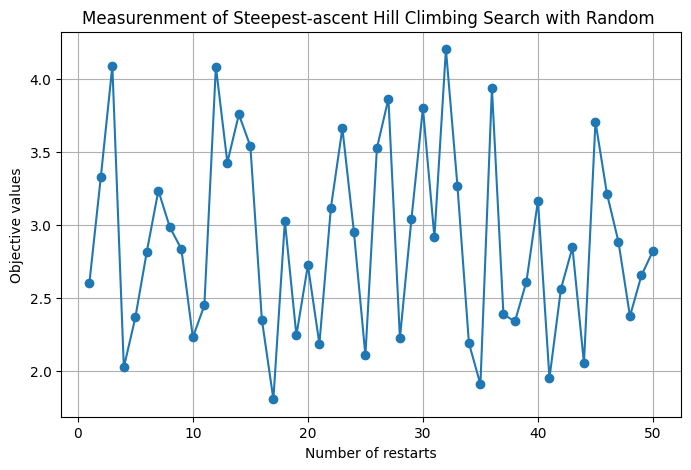

In [9]:
import matplotlib.pyplot as plt
def steepest_ascent_hill_climming_search_with_random_restarts(tsp, restarts_num):

  history = []
  best_tour_pair = None
  best_objective = float('inf')
  moves_count = 0


  for _ in range(restarts_num):

    tour_pair = random_tour_pair(len(tsp['pos']))
    best_tour_pair, moves = steepest_ascent_hill_climming_search(tsp, tour_pair)

    moves_count+=moves
    current_objective = tour_pair_max_length(tsp, best_tour_pair)
    history.append(tour_pair_max_length(tsp, best_tour_pair))

    if current_objective < best_objective:
      best_objective = current_objective
      best_tour_pair = best_tour_pair



  return restarts_num, history, best_tour_pair, moves_count

def plot_random_restarts(title, x_label, y_label, x_data, y_data):
  plt.figure(figsize=(8, 5))
  plt.plot(range(1, x_data+1), y_data, marker='o', linestyle='-')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.grid(True)
  plt.show()

tsp = random_tsp(10)

restarts_num, history, best_tour_pair, moves_count = steepest_ascent_hill_climming_search_with_random_restarts(tsp, 50)
plot_random_restarts("Measurenment of Steepest-ascent Hill Climbing Search with Random ", "Number of restarts", "Objective values", restarts_num ,history)



## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [10]:
import random
def stochastict_hill_climming(tsp, tour_pair):

  moves_count = 0
  t_1, t_2 = tour_pair

  best_max_tour_distance = tour_pair_max_length(tsp, tour_pair)
  best_tour_pair = tour_pair

  improved_tours = []

  for local_move in get_local_move(tour_pair):

    moves_count += 1
    local_tour_max_distance = tour_pair_max_length(tsp, local_move)

    #update best max distance and best tour pairs if one is found
    if local_tour_max_distance < best_max_tour_distance:
      best_max_tour_distance = local_tour_max_distance
      improved_tours.append(local_move)

  if not improved_tours:
    return best_tour_pair, moves_count

  best_tour_pair = random.choice(improved_tours)

  return best_tour_pair, moves_count

objective = []
local_moves = []
tsp = random_tsp(10)
for i in range(50):
  tour_pair = random_tour_pair(10)
  best_tour_pair, moves_count = stochastict_hill_climming(tsp, tour_pair)
  objective.append(tour_pair_max_length(tsp, best_tour_pair))
  local_moves.append(moves_count)

print(f"Average objective value: {np.mean(objective)}")
print(f"Average number of local moves: {np.mean(local_moves)}")

Average objective value: 3.022449953265186
Average number of local moves: 45.0


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [11]:


def first_choice_hill_climming(tsp, tour_pair):

  moves_count = 0
  t_1, t_2 = tour_pair
  best_tour_pair = tour_pair
  best_max_tour_distance = tour_pair_max_length(tsp, best_tour_pair)

  #shaffle randomble all posible pairs
  local_moves = list(get_local_move( tour_pair))
  random.shuffle(local_moves)

  for local_move in local_moves:
    moves_count += 1

    local_tour_max_distance = tour_pair_max_length(tsp, local_move)

    #return the first improvment seen
    if local_tour_max_distance < best_max_tour_distance:
      return local_move, moves_count





  return best_tour_pair, moves_count




objective = []
local_moves = []
tsp = random_tsp(10)
for i in range(50):
  tour_pair = random_tour_pair(10)
  best_tour_pair, moves_count = first_choice_hill_climming(tsp, tour_pair)
  objective.append(tour_pair_max_length(tsp, best_tour_pair))
  local_moves.append(moves_count)

print(f"Average objective value: {np.mean(objective)}")
print(f"Average number of local moves: {np.mean(local_moves)}")


Average objective value: 4.107131879468252
Average number of local moves: 2.16


## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [2]:
def temp_schedule(initial_value = 100, alpha = 0.99):

  while True:
    yield initial_value
    initial_value *=alpha

def simulated_annealing(tsp, tour_pair, temp_schedule, threshold):

  moves_count = 0
  best_tours = [] #keept track of all good tours

  best_max_tour_distance = tour_pair_max_length(tsp, tour_pair)
  best_tour_pair = tour_pair
  best_tours.append(tour_pair)

  for T in temp_schedule():


    #if temp < threshold break
    if T < threshold:
      break

    #each iteration one local move from all local moves is considered
    #at ramdom based on the current best tour
    local_moves = list(get_local_move(best_tour_pair))
    if not local_moves:
      break
    random.shuffle(local_moves)

    #select one local move ramdonly
    local_move = random.choice(local_moves)

    moves_count +=1

    local_tour_max_distance = tour_pair_max_length(tsp, local_move)

    delta_E = local_tour_max_distance - best_max_tour_distance
    #if new tour is better : take the tour
    # or if new tour is worse : accepted with a probability
    if delta_E < 0 or random.random() < math.exp(-delta_E / T):
      best_max_tour_distance = local_tour_max_distance
      best_tour_pair = local_move
      best_tours.append(local_move)

  return best_tours, best_tour_pair, moves_count

## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [13]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.13899803161621094 milliseconds


In [15]:
cities = [10, 20, 50]




for n in cities:
  print(f'{n} cities')

  tsp = random_tsp(n)
  tour_pair = random_tour_pair(len(tsp['pos']))
  time_limit = 5 #seconds

  start_time = time.time()
  annealing_objective = float('inf')
  annealing_runs = 0
  annealing_moves = 0
  while time.time() - start_time < time_limit:
    annealing_best_tours, annealing_best_tour_pair, annealing_moves_count = simulated_annealing(tsp, tour_pair, temp_schedule, 0.1)
    #collect metrics
    annealing_runs+= 1
    annealing_moves+= annealing_moves_count
    if tour_pair_max_length(tsp, annealing_best_tour_pair) < annealing_objective:
      annealing_objective = tour_pair_max_length(tsp, annealing_best_tour_pair)


  start_time = time.time()
  steepest_ascent_objective = float('inf')
  steepest_ascent_runs = 0
  steepest_ascent_moves = 0
  steepest_ascent_restarts = 0
  while time.time() - start_time < time_limit:
    restarts_num, history, steepest_ascent_best_tour_pair, steepest_ascent_moves_count = steepest_ascent_hill_climming_search_with_random_restarts(tsp, 50)
    #collect metrics
    steepest_ascent_runs+=1
    steepest_ascent_restarts+= restarts_num
    steepest_ascent_moves+= steepest_ascent_moves_count
    if tour_pair_max_length(tsp, steepest_ascent_best_tour_pair) < steepest_ascent_objective:
      steepest_ascent_objective = tour_pair_max_length(tsp, steepest_ascent_best_tour_pair)

  start_time = time.time()
  stochastict_ascent_objective = float('inf')
  stochastict_ascent_runs = 0
  stochastict_ascent_moves = 0
  while time.time() - start_time < time_limit:
    stochastict_best_tour_pair, stochastict_moves_count = stochastict_hill_climming(tsp, tour_pair)
    #collect metrics
    stochastict_ascent_runs+=1
    stochastict_ascent_moves+=stochastict_moves_count
    if tour_pair_max_length(tsp, stochastict_best_tour_pair) < stochastict_ascent_objective:
      stochastict_ascent_objective = tour_pair_max_length(tsp, stochastict_best_tour_pair)


  data = {
    'Simulated annealing': [annealing_objective, annealing_moves, annealing_runs ,annealing_moves/annealing_runs ,'N/A'],
    'Random restarts': [steepest_ascent_objective,steepest_ascent_moves , steepest_ascent_runs, steepest_ascent_moves/ steepest_ascent_runs , steepest_ascent_restarts],
    'Stochastic hill climbings' : [stochastict_ascent_objective, stochastict_ascent_moves, stochastict_ascent_runs ,stochastict_ascent_moves/stochastict_ascent_runs,  'N/A']
  }
  df = pd.DataFrame.from_dict(data, orient='index',
                            columns=['Objective', 'Moves', 'Runs', 'moves per run', 'Restarts'])
  print(df)





10 cities
                           Objective   Moves   Runs  moves per run Restarts
Simulated annealing         1.832864   67424     98          688.0      N/A
Random restarts             1.630348  924750    411         2250.0    20550
Stochastic hill climbings   2.567547  779580  17324           45.0      N/A
20 cities
                           Objective   Moves  Runs  moves per run Restarts
Simulated annealing         3.491285    5504     8          688.0      N/A
Random restarts             4.134556  361000    38         9500.0     1900
Stochastic hill climbings   5.016576  474240  2496          190.0      N/A
50 cities
                           Objective   Moves  Runs  moves per run Restarts
Simulated annealing        13.470109     688     1          688.0      N/A
Random restarts            14.557509  122500     2        61250.0      100
Stochastic hill climbings  17.505949  116375    95         1225.0      N/A


## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

Downloaded data and saved to states.pkl
[('Louisiana', 773189.1979394469, -1515002.377525561), ('Maryland', 1979094.0929296287, -383219.5841403244), ('Wisconsin', 789405.1598855292, 7178.093118233844), ('Florida', 1716480.2191801812, -1645210.600897309), ('Georgia', 1548181.6569137496, -1221152.92728593), ('Tennessee', 1227400.6102994615, -915322.7518723847), ('Minnesota', 437251.5679414956, 158022.4684412311), ('Iowa', 536318.2702880212, -303823.8620393781), ('Missouri', 657464.3949930624, -708334.2472004973), ('Michigan', 1154374.0876788201, 31062.850406589027), ('Idaho', -1153546.3198592367, 32306.322358552956), ('California', -1708049.274751084, -667730.6252787685), ('Connecticut', 2216157.7595848595, -1386.5813699763721), ('Texas', 66673.11730108206, -1502504.3982431893), ('Virginia', 1848871.780566167, -594407.8114616707), ('New York', 1957067.0071638965, 68085.33717547444), ('Illinois', 917185.1983259161, -491248.59737063444), ('Montana', -727314.0192655406, 271896.712857685), (

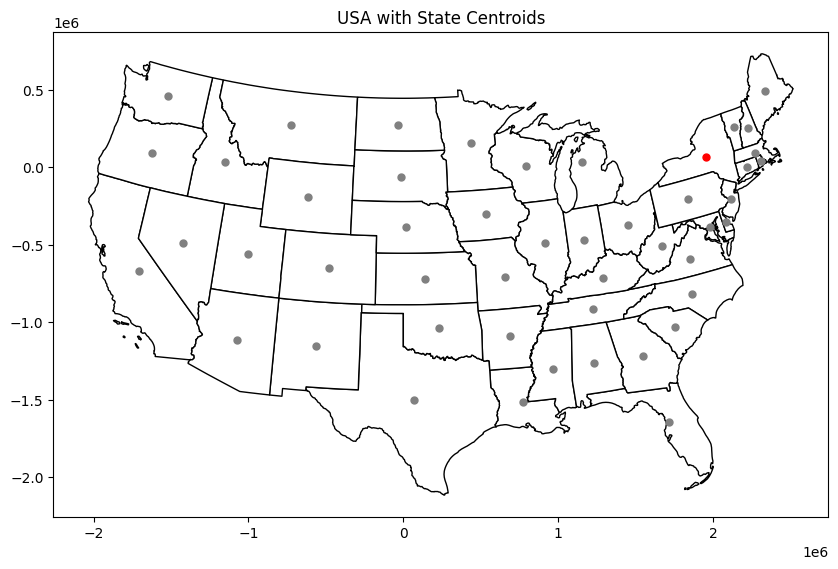

In [4]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")
    plt.show()

draw_contiguous_usa_map_with_centroids()

Loaded from states.pkl
Best tour lenght: 20536083.204285566
New York=0, Louisiana=1, Vermont=2, Maine=3, New Hampshire=4, Montana=5, Iowa=6, Oregon=7, Washington=8, Utah=9, California=10, Nevada=11, Idaho=12, North Dakota=13, Arkansas=14, Mississippi=15, Alabama=16, New York=17, 
New York=0, Florida=1, Georgia=2, Maryland=3, New Jersey=4, Delaware=5, Pennsylvania=6, Indiana=7, Missouri=8, South Dakota=9, Illinois=10, Tennessee=11, Kentucky=12, West Virginia=13, Connecticut=14, Rhode Island=15, Massachusetts=16, Virginia=17, North Carolina=18, South Carolina=19, Ohio=20, Michigan=21, Nebraska=22, Wyoming=23, Kansas=24, Oklahoma=25, Texas=26, New Mexico=27, Arizona=28, Colorado=29, Wisconsin=30, Minnesota=31, New York=32, 
Loaded from states.pkl


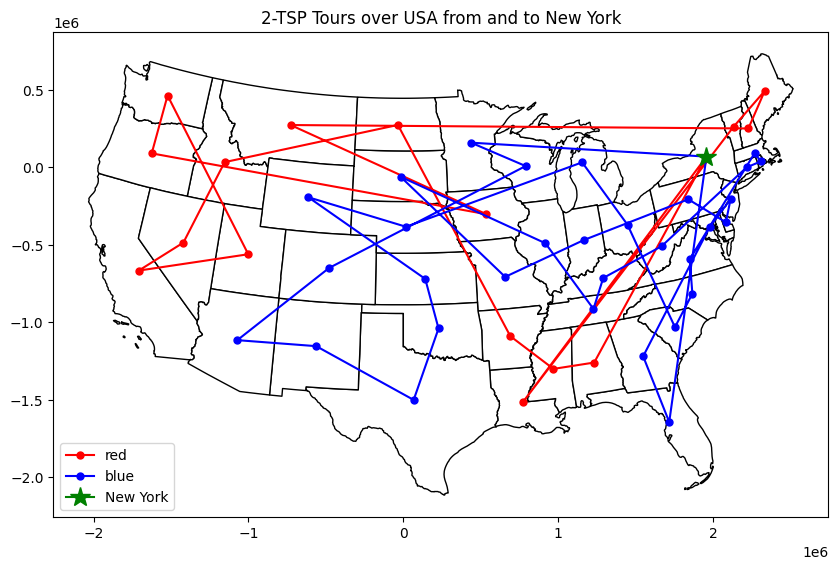

In [10]:
'''
TO-DO

1)create the tsp (ok)
2)create the initial tour pair (ok)
3)function to calculate distance (ok)
4)modified Simulated annealing algorithm (ok)
5)implement function to show/vizualize the path of the 2 tours

'''
import random
def get_state_index(tsp, state_name):
  return tsp['pos'][tsp['pos']['state'] == state_name].index[0]

def get_us_tsp():
  _, state_tuples = get_state_centroids()

  pos = pd.DataFrame(state_tuples, columns=['state', 'x', 'y'])
  dist = squareform(pdist(pos[['x', 'y']]))
  return {'pos': pos, 'dist': dist}

def get_us_tour_pair(tsp, initial_state):
  initial_state_index = get_state_index(tsp, initial_state)
  state_indecies = list(tsp['pos'].index)
  #remove the initial city
  state_indecies.remove(initial_state_index)
  np.random.shuffle(state_indecies)

  split = random.randint(0, len(state_indecies)-1)
  tour1 = state_indecies[:split]
  tour2 = state_indecies[split:]

  #add the initial city (NY) as the start and end
  tour1 = [initial_state_index] + tour1 + [initial_state_index]
  tour2 = [initial_state_index] + tour2 + [initial_state_index]

  return tour1, tour2

def us_get_local_move(tour_pair):

  t_1 , t_2 = tour_pair
  seen_pairs = []
  seen_pairs.append(tour_pair)


  #swap cities within each tour
  for tour_index in [0,1]:
    tour = tour_pair[tour_index]

    #only the initial state(new york) is on the tour
    if len(tour) <= 2:
      continue
    #skip the first and last states
    for i in range(1, len(tour)):
      for j in range(i+1, len(tour)-1):
        new_tour = tour.copy()
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]

        if tour_index == 0:
          new_tour_pair = (new_tour, t_2)
        else:
          new_tour_pair = (t_1, new_tour)

        if new_tour_pair in seen_pairs:
          continue

        seen_pairs.append(new_tour_pair)


        yield new_tour_pair

  #swap cities between tours
  if not t_1 or not t_2:
    return

  for i in range(1, len(t_1)-1):
    for j in range(1,len(t_2)-1):
      new_tour_1 = t_1.copy()
      new_tour_2 = t_2.copy()

      new_tour_1[i], new_tour_2[j] = new_tour_2[j],  new_tour_1[i]
      new_tour_pair = (new_tour_1, new_tour_2)

      if new_tour_pair in seen_pairs:
          continue

      seen_pairs.append(new_tour_pair)

      yield new_tour_pair
def us_tour_pair_max_length(tsp, tour_pair):

   tour0_len = us_tour_length(tsp, tour_pair[0])
   tour1_len = us_tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def us_tour_length(tsp, tour):

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    return tl
def us_simulated_annealing(tsp, tour_pair, temp_schedule, threshold):

  moves_count = 0
  best_tours = [] #keept track of all good tours

  best_max_tour_distance = us_tour_pair_max_length(tsp, tour_pair)
  best_tour_pair = tour_pair
  best_tours.append(tour_pair)

  for T in temp_schedule():


    #if temp < threshold break
    if T < threshold:
      break

    #each iteration one local move from all local moves is considered
    #at ramdom based on the current best tour
    local_moves = list(us_get_local_move(best_tour_pair))
    if not local_moves:
      break
    random.shuffle(local_moves)

    #select one local move ramdonly
    local_move = random.choice(local_moves)

    moves_count +=1

    local_tour_max_distance = us_tour_pair_max_length(tsp, local_move)

    delta_E = local_tour_max_distance - best_max_tour_distance
    #if new tour is better : take the tour
    # or if new tour is worse : accepted with a probability
    if delta_E < 0 or random.random() < math.exp(-delta_E / T):
      best_max_tour_distance = local_tour_max_distance
      best_tour_pair = local_move
      best_tours.append(local_move)

  return best_tours, best_tour_pair, moves_count

def show_us_2tsp(tsp, tour_pair, initial_state):
  contiguous_usa, _ = get_state_centroids()

  fig, ax = plt.subplots(1, 1, figsize=(10, 8))
  contiguous_usa.plot(ax=ax, color='white', edgecolor='black')
  colors = ['red', 'blue']
  pos = tsp['pos']
  for tour, color in zip(tour_pair, colors):

    tour_x_list = [pos.loc[i, 'x'] for i in tour]
    tour_y_list = [pos.loc[i, 'y'] for i in tour]

    # wrap back to start
    #tour_x_list.append(tour_x_list[0])
    #tour_y_list.append(tour_y_list[0])

    ax.plot(tour_x_list, tour_y_list, color=color, marker='o', markersize=5, label=color)

  initial_state_index = get_state_index(tsp, initial_state)
  state = tsp['pos'].loc[initial_state_index]
  ax.plot(state['x'], state['y'], marker='*', color='Green', markersize=15, label=initial_state)
  plt.title(f"2-TSP Tours over USA from and to {initial_state}")
  plt.legend()
  plt.show()

def display_tour(tsp, tour_pair):
  states_look_up = tsp['pos']['state'].tolist()
  t_1 , t_2 = tour_pair
  for i, j in enumerate(t_1):
    print(f'{states_look_up[j]}={i}', end=', ')
  print()
  for i, j in enumerate(t_2):
    print(f'{states_look_up[j]}={i}', end=', ')
  print()

def tour_us_states(initial_state):
  tsp = get_us_tsp()
  tour_pair = get_us_tour_pair(tsp, initial_state)
  best_tours, best_tour_pair, moves_count = us_simulated_annealing(tsp, tour_pair, temp_schedule, 0.1)
  print(f'Best tour lenght: {us_tour_pair_max_length(tsp, best_tour_pair)}')

  display_tour(tsp, best_tour_pair)
  show_us_2tsp(tsp, best_tour_pair, initial_state)

tour_us_states('New York')




---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
